# Baselines

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()
import seaborn as sns

In [2]:
import mantrap
import mantrap_evaluation
import pandas as pd
import torch

solvers = {"rrt": mantrap.solver.baselines.RRTStarSolver, 
           "orca": mantrap.solver.baselines.ORCASolver,
           "mcts": mantrap.solver.baselines.MonteCarloTreeSearch,
           "ipopt": mantrap.solver.IPOPTSolver}

eval_df = pd.DataFrame()
for num_ados in [2, 3, 4, 10]:
    for n in range(5):
        env, goal, _ = mantrap_evaluation.scenarios.random(mantrap.environment.PotentialFieldEnvironment, 
                                                           num_ados=num_ados)
        for name, solver in solvers.items():
            print(f"Evaluating {name} => {num_ados} => {n}")
            solver = solver(env, goal, warm_start=mantrap.constants.WARM_START_SOFT,
                            attention_module=mantrap.attention.ClosestModule,
                            eval_env=mantrap.environment.SGAN)
            eval_df_k, _, _ = mantrap_evaluation.evaluate(solver, label=name, time_steps=10, num_tests=3, mean_df=False)
            eval_df_k["num_ados"] = num_ados
            eval_df_k["method"] = name
            eval_df = eval_df.append(eval_df_k)

Evaluating rrt => 2 => 0
Evaluating orca => 2 => 0
Evaluating mcts => 2 => 0
Evaluating ipopt => 2 => 0
Evaluating rrt => 2 => 1
Evaluating orca => 2 => 1
Evaluating mcts => 2 => 1
Evaluating ipopt => 2 => 1
Evaluating rrt => 2 => 2
Evaluating orca => 2 => 2
Evaluating mcts => 2 => 2
Evaluating ipopt => 2 => 2
Evaluating rrt => 2 => 3
Evaluating orca => 2 => 3
Evaluating mcts => 2 => 3
Evaluating ipopt => 2 => 3
Evaluating rrt => 2 => 4
Evaluating orca => 2 => 4
Evaluating mcts => 2 => 4
Evaluating ipopt => 2 => 4
Evaluating rrt => 3 => 0
Evaluating orca => 3 => 0
Evaluating mcts => 3 => 0
Evaluating ipopt => 3 => 0
Evaluating rrt => 3 => 1
Evaluating orca => 3 => 1
Evaluating mcts => 3 => 1
Evaluating ipopt => 3 => 1
Evaluating rrt => 3 => 2
Evaluating orca => 3 => 2
Evaluating mcts => 3 => 2
Evaluating ipopt => 3 => 2
Evaluating rrt => 3 => 3
Evaluating orca => 3 => 3
Evaluating mcts => 3 => 3
Evaluating ipopt => 3 => 3
Evaluating rrt => 3 => 4
Evaluating orca => 3 => 4
Evaluating mc

In [3]:
eval_df

,ado_effort,directness,ego_effort,extra_time,final_distance,minimal_distance,runtime[s],num_ados,method
0,6.793840,0.484638,1.079850,-0.4,0.559390,3.633220,0.292474,2,rrt
1,6.954320,0.450317,1.174643,-0.4,0.530899,4.074763,0.287495,2,rrt
2,6.825668,0.306913,1.208022,-0.4,0.857836,2.450517,0.275714,2,rrt
0,4.900637,1.000000,1.000000,-0.4,0.033768,2.199532,0.014224,2,orca
1,6.455099,1.000000,1.000000,-0.4,0.033768,2.006900,0.014245,2,orca
...,...,...,...,...,...,...,...,...,...
1,4.963565,0.756605,0.844792,0.4,0.177582,4.113307,0.231219,10,mcts
2,4.915460,0.945860,0.619190,0.4,0.299940,4.960670,0.185095,10,mcts
0,4.660780,0.999514,0.593852,0.4,0.245587,3.970376,0.037539,10,ipopt
1,5.336486,0.997110,0.737224,0.4,0.176175,3.851580,0.581886,10,ipopt


In [13]:
eval_df.to_csv("eval_data.csv")

In [4]:
eval_df.groupby("method").mean()

,ado_effort,directness,ego_effort,extra_time,final_distance,minimal_distance,runtime[s],num_ados
method,,,,,,,,
ipopt,6.561291,0.942694,0.552552,5.551115e-18,0.356347,3.656549,0.341219,4.75
mcts,6.743955,0.852887,0.760156,6.133333e-01,0.507698,3.523429,0.749733,4.75
orca,6.540884,0.855554,0.976444,-3.800000e-01,0.184448,3.308171,0.026581,4.75
rrt,6.911215,0.571993,1.143579,-3.400000e-01,0.543189,3.023576,0.278437,4.75


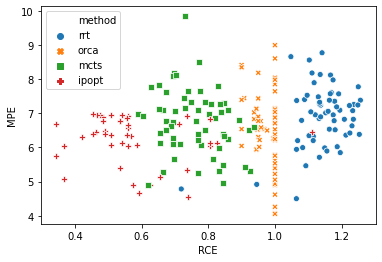

In [66]:
sns.scatterplot("ego_effort", "ado_effort", hue="method", style="method", data=eval_df_filtered)
plt.xlabel("RCE")
plt.ylabel("MPE")
plt.show()

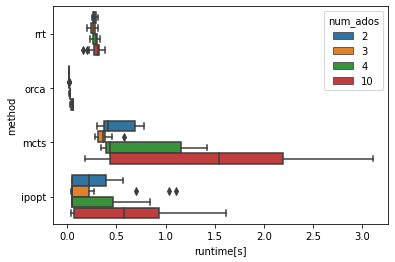

In [14]:
sns.boxplot("runtime[s]", y="method", hue="num_ados", data=eval_df)
plt.show()

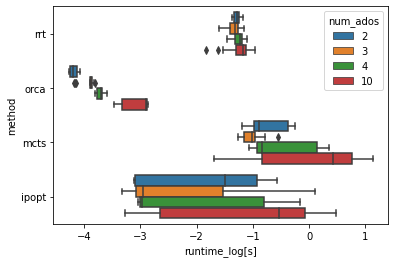

In [15]:
import numpy as np
eval_df["runtime_log[s]"] = np.log(eval_df["runtime[s]"])
sns.boxplot("runtime_log[s]", y="method", hue="num_ados", data=eval_df)
plt.savefig("/Users/sele/Desktop/runtime_peds.png", dpi=150)
plt.show()